<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/B2B_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B2B Survey Correlation Matrix

## Importing libraries

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [ ]:
# Loading data from local drive
from google.colab import files
uploaded1 = files.upload()

In [59]:
# Storing loaded data to a pandas dataframe
import io
df1 = pd.read_excel((io.BytesIO(uploaded1['ICE_raw_data_B2B_label_0.1_af.xlsx'])), skiprows=1)

In [60]:
# Checking the dataframe
df1.head()

,Survey subject ID,{XX} engasjerer seg i og setter i gang tiltak som bidrar til en bærekraftig utvikling for fremtidige generasjoner,{XX} er enkle å forholde seg til?,{XX} er et pålitelig mobilselskap?,{XX} er nytenkende og innovative?,{XX} evner å forstå din bedrift og deres behov som kunde?,{XX} gjør det de kan for å lykkes finansielt uten at det går på bekostning av sosiale og miljømessige faktorer,{XX} holder dere godt informert om ting som påvirker deres kundeforhold?,{XX} kommuniserer sitt bærekraftsarbeide på en bra måte?,{XX} tar et miljøansvar i sin daglige drift?,...,Opplever du at fakturaene fra {XX} er korrekte?,På hvilken måte omtaler dere {XX} til andre?,Portering av nummer - Hva gjaldt klagen? (flervalg),samtalekvaliteten (klar og tydelig linje uten brudd)?,servicen dere får hos {XX} i forhold til det dere betaler?,svartiden på henvendelsen din?,Tenk på all erfaring din bedrift har som mobilkunde av {XX}. Hvor fornøyd er dere alt i alt?,tilgangen på 4G-nettet?,"Utstyr (mobiltelefon, sim-kort eller lignende) - Hva gjaldt klagen? (flervalg)",Vurderer dere å bytte mobilselskap det nærmeste året?
0,2,11,9,8,9,6,11,7,11,11,...,1,10,NaN,6,7,NaN,9,7,NaN,3
1,3,1,1,1,1,1,1,1,11,11,...,2,1,NaN,1,1,3.0,1,4,NaN,1
2,4,11,6,7,7,5,11,5,11,11,...,1,7,NaN,7,5,NaN,6,5,NaN,1
3,5,11,5,7,6,5,11,7,11,11,...,2,7,NaN,6,6,8.0,7,6,NaN,2
4,34,11,9,9,11,8,11,8,11,11,...,1,8,NaN,9,11,NaN,9,7,NaN,2


## Data Cleaning

In [61]:
# Set first column as index
df1.set_index('Survey subject ID', inplace=True)

In [62]:
# Filling missing values with zero (0)
df1 = df1.fillna(0)
sum([i for i in df1.isnull().sum()])

0

In [78]:
# Extracting questions to list of dictionary and creating DataFrame
df1_col = [i for i in df1.columns]
df1_col = pd.DataFrame(df1_col, index=["q"+str(i+1) for i in range(len(df1.columns))], columns=['Questions'])
df1_col

,Questions
q1,{XX} engasjerer seg i og setter i gang tiltak ...
q2,{XX} er enkle å forholde seg til?
q3,{XX} er et pålitelig mobilselskap?
q4,{XX} er nytenkende og innovative?
q5,{XX} evner å forstå din bedrift og deres behov...
...,...
q70,svartiden på henvendelsen din?
q71,Tenk på all erfaring din bedrift har som mobil...
q72,tilgangen på 4G-nettet?
q73,"Utstyr (mobiltelefon, sim-kort eller lignende)..."


In [79]:
# Replacing string columns with alphanumeric series
df1.columns = ["q"+str(i+1) for i in range(len(df1.columns))]
df1.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31',
       'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q40', 'q41',
       'q42', 'q43', 'q44', 'q45', 'q46', 'q47', 'q48', 'q49', 'q50', 'q51',
       'q52', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61',
       'q62', 'q63', 'q64', 'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q71',
       'q72', 'q73', 'q74'],
      dtype='object')

## Correlation Matrix generation

In [80]:
# Calculate correlation matrix between variables
corr_mx1 = pd.DataFrame(round(df1.corr(), 2))
corr_mx1

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74
q1,1.00,0.19,0.25,0.33,0.26,0.70,0.24,0.48,0.62,0.12,...,0.03,0.26,0.04,0.11,0.20,-0.09,0.24,0.21,0.05,0.16
q2,0.19,1.00,0.57,0.29,0.48,0.25,0.45,0.16,0.06,0.51,...,-0.24,0.44,-0.22,0.44,0.60,0.12,0.67,0.46,-0.22,0.37
q3,0.25,0.57,1.00,0.32,0.57,0.20,0.51,0.20,0.04,0.40,...,-0.19,0.47,-0.13,0.50,0.57,0.23,0.69,0.54,-0.12,0.30
q4,0.33,0.29,0.32,1.00,0.36,0.32,0.40,0.26,0.20,0.30,...,-0.11,0.34,-0.02,0.31,0.29,-0.02,0.32,0.24,-0.02,0.21
q5,0.26,0.48,0.57,0.36,1.00,0.25,0.59,0.17,0.10,0.56,...,-0.20,0.50,-0.07,0.43,0.65,0.17,0.52,0.32,-0.07,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q70,-0.09,0.12,0.23,-0.02,0.17,-0.07,0.17,-0.08,-0.14,0.12,...,-0.04,0.16,-0.10,0.20,0.19,1.00,0.15,0.11,-0.09,0.18
q71,0.24,0.67,0.69,0.32,0.52,0.22,0.48,0.13,0.12,0.40,...,-0.32,0.57,-0.23,0.51,0.64,0.15,1.00,0.50,-0.24,0.45
q72,0.21,0.46,0.54,0.24,0.32,0.23,0.38,0.15,0.13,0.25,...,-0.04,0.43,-0.06,0.54,0.45,0.11,0.50,1.00,-0.05,0.32
q73,0.05,-0.22,-0.12,-0.02,-0.07,-0.01,-0.03,0.05,0.07,-0.19,...,0.01,-0.09,0.95,0.04,-0.08,-0.09,-0.24,-0.05,1.00,-0.05


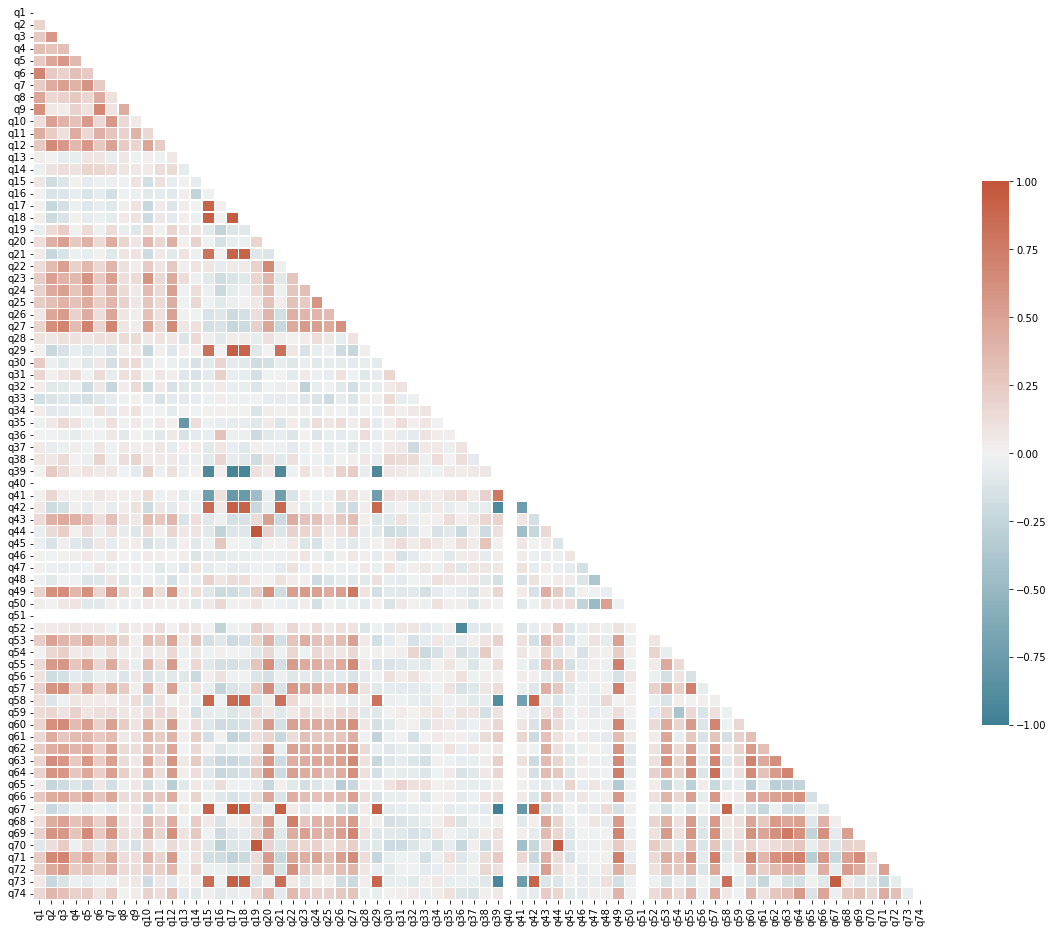

In [84]:
# Defining the size of heatmap
fig1, ax1 = plt.subplots(figsize=(20, 20))

# Generating a mask for the upper triangle of the correlation matrix
mask1 = np.triu(np.ones_like(corr_mx1, dtype=bool))

# Generating a custom diverging colormap
cmap1 = sns.diverging_palette(220, 20, as_cmap=True)# l=0, s=100)

# Plotting seaborn heatmap
sns.heatmap(data=corr_mx1, mask=mask1, cmap=cmap1, vmin=-1.0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Exporting results to local drive

In [83]:
# Exporting files to excel
# from google.colab import files
with pd.ExcelWriter('b2b_corr_mx.xlsx', engine='openpyxl') as writer:
  df1_col.to_excel(writer, sheet_name='1_questions', index=True)
  corr_mx1.to_excel(writer, sheet_name='2_b2b_corr', index=True)
files.download('b2b_corr_mx.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>